# 수치미분 
- 대략적 기울기
- 매우 작은 수(x변화량) dx를 직접 줘야 한다. 
- 대략적 기울기 값이라 정확한 값은 알 수 없다.

In [26]:
from scipy.misc import derivative

def koleos(x) : 
    return x**3-3*x**2+x


print(derivative(koleos, 0, dx=1/10000))
print(derivative(koleos, 1, dx=1e-6))
print()
print(derivative(koleos, -0.5, dx=1/1000))
print(derivative(koleos, 0.5, dx=1e-6))
print(derivative(koleos, 1.5, dx=1e-6))
print(derivative(koleos, 2, dx=1e-6))
print(derivative(koleos, 2.5, dx=1/100000))

1.00000001
-2.000000000002

4.750000999999893
-1.2499999999804334
-1.2500000001747225
1.000000000139778
4.7500000000422204


# 미분의 결과 : 도함수 
- 미분은 도함수 구하는 작업이다. 
- 도함수는 각 지점에서의 기울기 구하는 함수다. 

In [41]:
#4.2.2 연습문제 
x = np.array([-0.5, 0, 0.5, 1,1.5, 2, 2.5])
y = np.array([2, 1, -0.25, -2,-0.75, 0.75, 4])

df = np.vstack([x,y])
df = pd.DataFrame(df)
df.rename(mapper={0:'$x$'}, axis=0, inplace=True)
df.rename(mapper={1:'$y$'}, axis=0, inplace=True)
df

,0,1,2,3,4,5,6
$x$,-0.5,0.0,0.50,1.0,1.50,2.00,2.5
$y$,2.0,1.0,-0.25,-2.0,-0.75,0.75,4.0


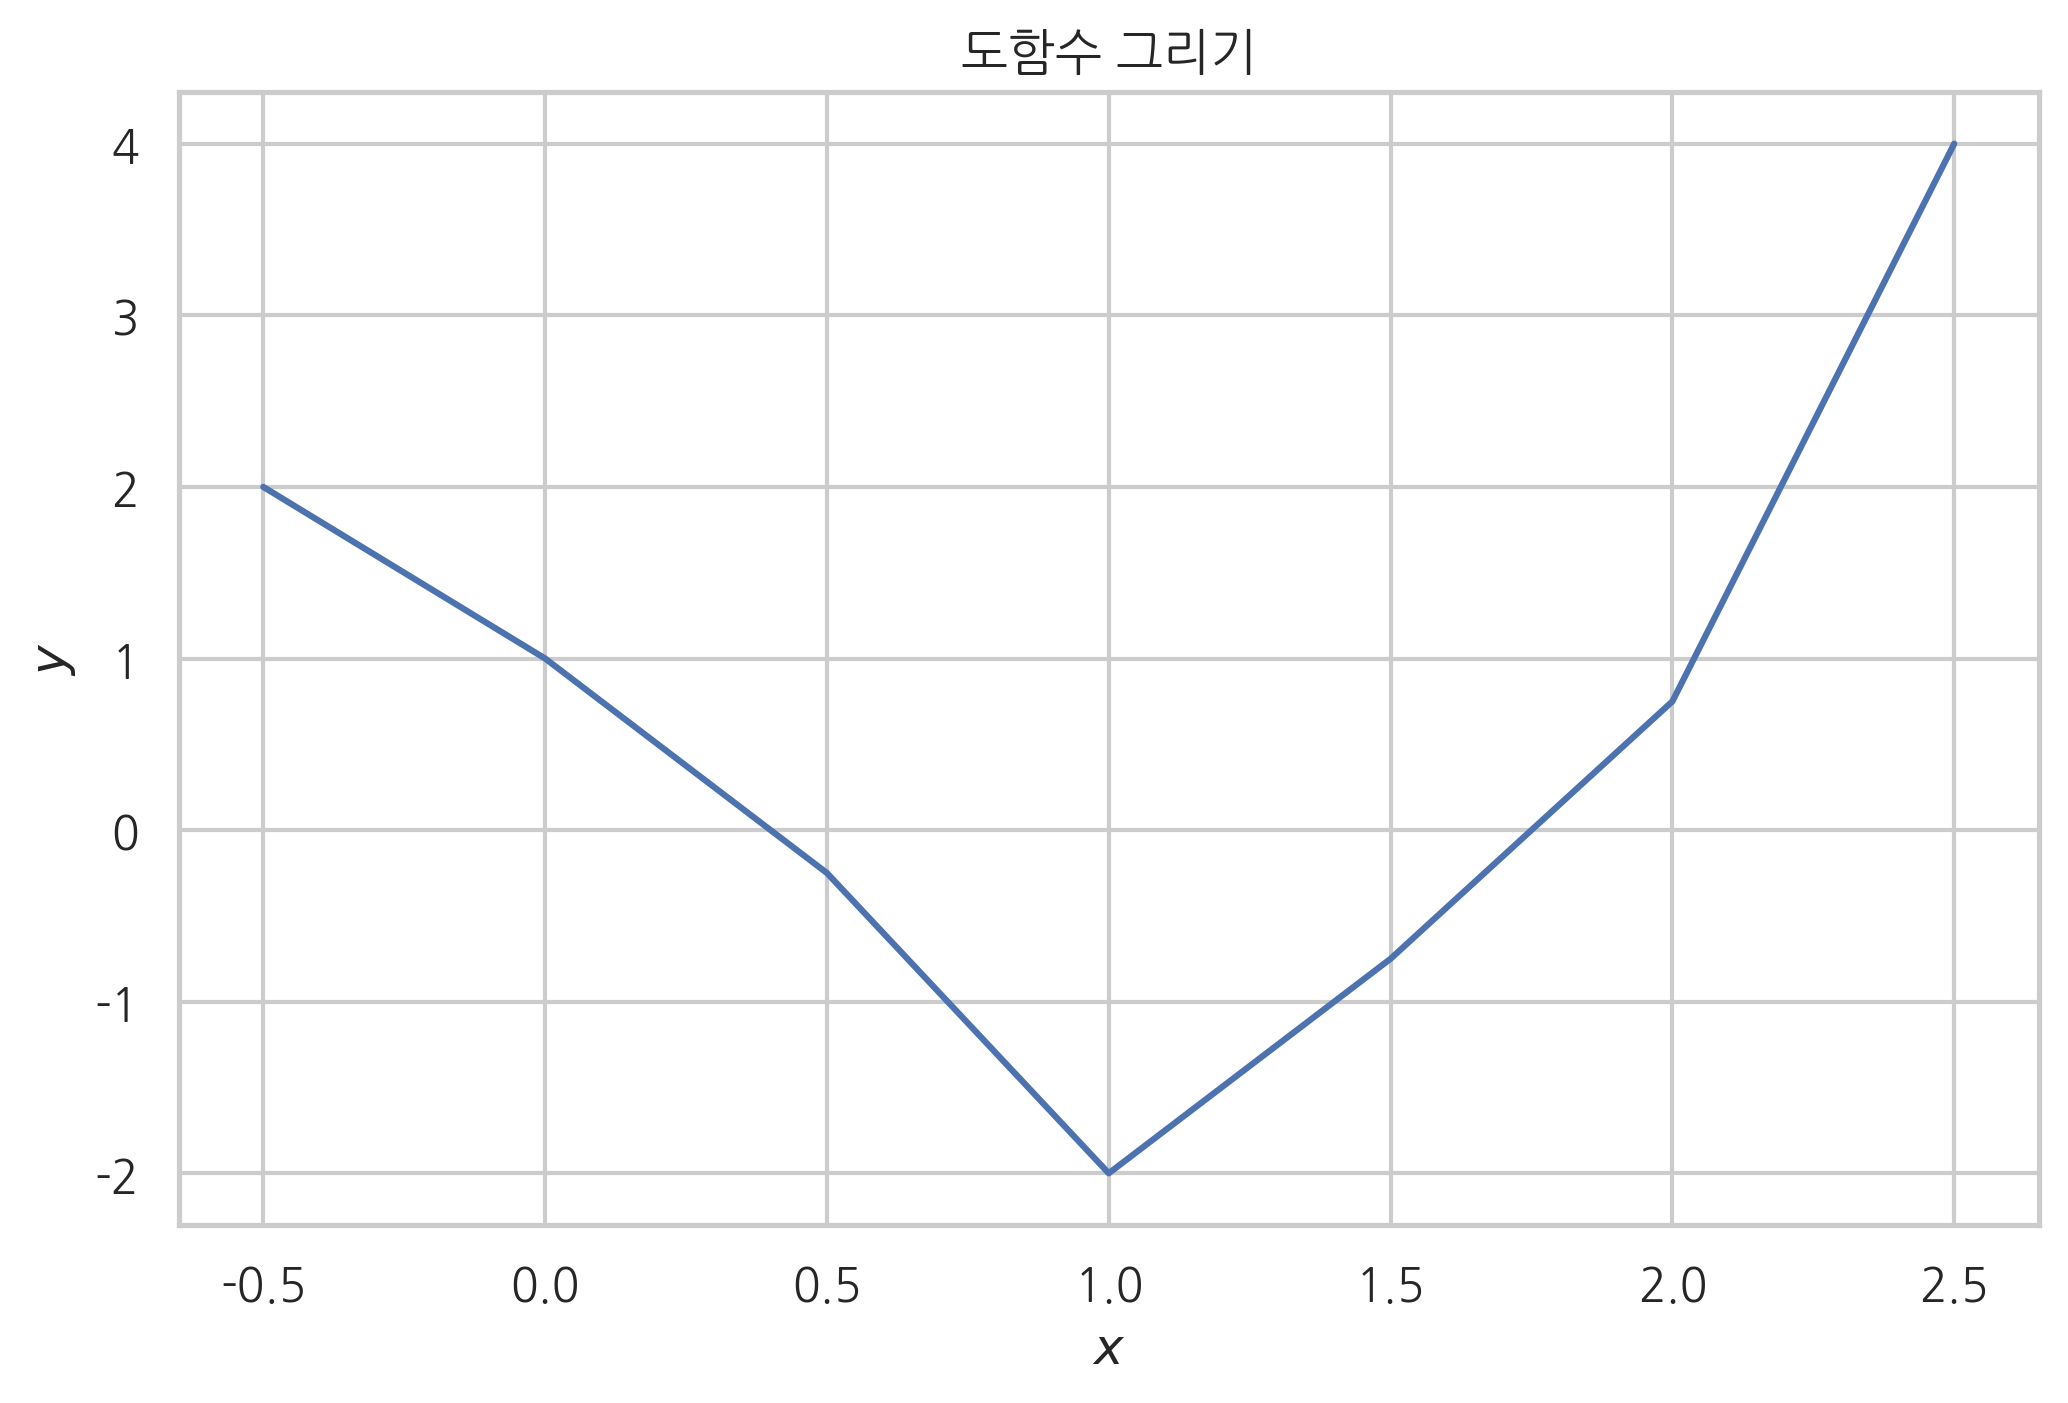

In [45]:
# 도함수 그리기 - 라인플롯 이용
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('도함수 그리기')
plt.show()

# 심파이로 심볼릭 연산하기 
- 프로그래밍 변수 : 숫자, 벡터가 이미 대입된 기호
- 심볼릭 변수 : 숫자, 벡터 등 아무것도 대입되지 않은 변수

In [42]:
import sympy

sympy.init_printing(use_latex='mathjax')

#심볼릭 변수 지정하기 
x = sympy.symbols('x')
x

x

In [15]:
type(x) #심볼객체다.

sympy.core.symbol.Symbol

In [19]:
f = x*sympy.exp(x)
f

   x
x⋅ℯ 

In [22]:
f_diff = sympy.diff(f)
sympy.simplify(f_diff)

         x
(x + 1)⋅ℯ 

In [41]:
x, y = sympy.symbols('x y')
f = x**2+4*x*y+4*y**2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [45]:
sympy.diff(f, y)

4⋅x + 8⋅y

In [46]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [55]:
x, mu, sigma = sympy.symbols('x, mu, sigma')
f = sympy.exp((x-mu)**2/sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [57]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [58]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

# 2차 도함수(도함수의 기울기(볼록도))

In [60]:
sympy.simplify(sympy.diff(f, x,x))

                            2
                     (μ - x) 
                     ────────
                         2   
  ⎛ 2            2⎞     σ    
2⋅⎝σ  + 2⋅(μ - x) ⎠⋅ℯ        
─────────────────────────────
               4             
              σ              

In [68]:
#4.2.5 연습문제 
#1.
x = sympy.symbols('x')
f = x**3-1
f

 3    
x  - 1

In [69]:
sympy.diff(f)

   2
3⋅x 

In [79]:
#2. 
x, k = sympy.symbols('x, k')
f2 = sympy.log(x**2-3*k)
f2

   ⎛        2⎞
log⎝-3⋅k + x ⎠

In [84]:
sympy.diff(f2, x) #편미분하듯이

   2⋅x   
─────────
        2
-3⋅k + x 

In [89]:
sympy.simplify(sympy.diff(f2, x)) # 식 깔끔하게 정리해라

   2⋅x   
─────────
        2
-3⋅k + x 

In [88]:
#3. 
a, x, b = sympy.symbols('a, x, b')
type(a)
f3 = sympy.exp(a*x**b)
f3

    b
 a⋅x 
ℯ    

In [91]:
sympy.simplify(sympy.diff(f3, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

In [97]:
#4.2.6 연습문제 
x, y = sympy.symbols('x, y')
f4 = sympy.exp(x**2+2*y**2)
f4

  2      2
 x  + 2⋅y 
ℯ         

# 다변수함수 편미분 - 2차 도함수 6가지 

In [99]:
#1차 편미분 fx
fx = sympy.diff(f4, x)
fx

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [111]:
#1차 편미분 fy
fy = sympy.diff(f4, y)
sympy.simplify(fy)

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [110]:
#2차 편미분 fxx
fxx = sympy.diff(f4, x, x)
sympy.simplify(fxx)

             2      2
⎛   2    ⎞  x  + 2⋅y 
⎝4⋅x  + 2⎠⋅ℯ         

In [107]:
#2차 편미분 fyy
fyy = sympy.diff(f4, y,y)
sympy.simplify(fyy) 

              2      2
⎛    2    ⎞  x  + 2⋅y 
⎝16⋅y  + 4⎠⋅ℯ         

- 아래를 보면 슈와르츠 정리도 성립한다. 
* 함수가 연속, 전구간 미분가능할 때 : 2차 도함수 구하는 과정에서 입력변수 모두 써서 편미분 할 때 x, y 순서 달리해도 결과 같다. 

In [108]:
#2차 편미분 fxy
fxy = sympy.diff(f4, x,y)
sympy.simplify(fxy)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [109]:
#2차 편미분 fyx
fyx = sympy.diff(f4, y, x)
sympy.simplify(fxy)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [113]:
# 테스트 
x, y, z = sympy.symbols('x,y,z')


 3          
x  + 4⋅y + z

In [118]:
f_test = sympy.exp(x**2+2*y**2+z)
f_test

  2      2    
 x  + 2⋅y  + z
ℯ             

In [125]:
sympy.diff(f_test, z, x)

      2      2    
     x  + 2⋅y  + z
2⋅x⋅ℯ             

In [126]:
sympy.diff(f_test, x, z)

      2      2    
     x  + 2⋅y  + z
2⋅x⋅ℯ             